In [ ]:
# https://omegaml.github.io/omegaml/guide/getstarted.html#starting-omega-ml-locally

# !wget https://raw.githubusercontent.com/omegaml/omegaml/master/docker-compose.yml
# !docker-compose up -d

In [1]:
import omegaml as om

In [2]:
om.models.list()

['classifier_50000', 'classifier_new', 'classifier_om', 'classifier_skl']

In [3]:
om.datasets.list()

['X_test',
 'flatten_digits',
 'flatten_image',
 'flatten_test',
 'np_input',
 'stream-classifier_om',
 'stream-classifier_skl',
 'targets',
 'train_images']

In [4]:
import matplotlib.pyplot as plt

# Import the mnist dataset
# https://github.com/datapythonista/mnist
import mnist

# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import time
import random

## Load the data

In [5]:
# Choose the size of the training dataset
row_number = 50000

In [6]:
# The mnist dataset originally 28x18
all_images = mnist.train_images()

# Downsample the training dataset
assert row_number<= all_images.shape[0], 'The number of rows wanted is higher than the size of the training dataset.'
train_images = all_images[:row_number, :]

# train_labels
all_labels = mnist.train_labels()
train_labels = all_labels[:row_number]

In [37]:
# Load the test dataset
test_images = mnist.test_images()
test_labels = mnist.test_labels()

## Assess the quality of the training and test datasets

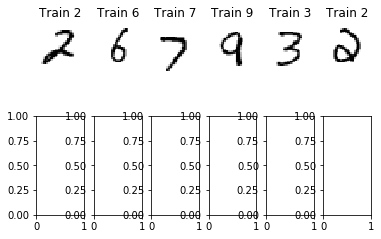

In [19]:
# Show a random sample of drawings from the train_images
n_show = 6
n = random.randint(n_show,train_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(train_images, train_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Train %i' % label)

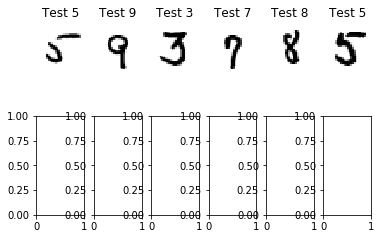

In [60]:
# Show a random sample of drawings from the test_images (for quality check)
n_show = 6
n = random.randint(n_show,test_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(test_images, test_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test %i' % label)

## Preprocessing

In [11]:
# Flattening the images
flatten_images = train_images.reshape((train_images.shape[0], -1))
# Normalising the images
flatten_images = flatten_images/255 # https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

In [47]:
# Flattening the test set
flatten_test = test_images.reshape((test_images.shape[0], -1))
# Normalising the images
flatten_test = flatten_test/255 # https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

## Train a model

In [13]:
# Create a classifier: a support vector classifier
classifier_new = svm.SVC(gamma=0.001)

In [14]:
# Train the model
# Time consuming task generally realized in XXmin
start_time = time.time()

classifier_new.fit(flatten_images, train_labels)

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model fitted in '+ str(dur_min) + " minutes.")

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Publishing the model
# Time consuming task generally realized in XXmin
start_time = time.time()

om.models.put(classifier_new, 'classifier_new')

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model stored in '+ str(dur_min) + " minutes.")

<Metadata: Metadata(name=classifier_new,bucket=omegaml,prefix=models/,kind=sklearn.joblib,created=2020-11-24 16:18:22.454000)>

In [16]:
om.models.revisions('classifier_new')

[('8b4c328d2a08520442de7aefe76bf157a70285d3', ''),
 ('a44fac815fc5da0ce5191d555771f5a342ce570a', ''),
 ('7aa465df04346205cac718e235a2e76c55bd1596', ''),
 ('8ac120a89d6e7cb1b50d3b3dece5384cd1de2563', ''),
 ('a02768f86e7432464cff507242e6c47f2b15f971', ''),
 ('1390e2f6de9dde791a62e12f148ae0961b44a08e', ''),
 ('a98ae7758e7092ab99489d7837c2bc84a0308665', ''),
 ('876c14c6aff8198719b80dccffe23f7b2991dcb5', ''),
 ('ef6a039d8afc40d7f56dff5804aa0f163ce43598', ['latest'])]

In [17]:
# Retrieving a model
classifier_new_test = om.models.get('classifier_new')
classifier_new_test

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing on a single instance

Instance from the mnist.test_images() on row 1841
Expected: 0
Predicted: 0


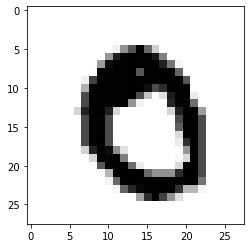

In [42]:
n = random.randint(0,test_images.shape[0])
test_single = test_images[n]

flatten_test = test_single.reshape(1, -1)/255 # Do not forget to normalize !
predicted = classifier_new_test.predict(flatten_test)

plt.imshow(test_single, cmap=plt.cm.gray_r, interpolation='nearest')
print('Instance from the mnist.test_images() on row %i' %n)
print('Expected: %i' % test_labels[n])
print('Predicted: %i' % predicted)

## Model metrics

In [50]:
# Predict the full test dataset
# Time consuming task generally realized in XXmin
start_time = time.time()

predicted = classifier_new_test.predict(flatten_test)

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model stored in '+ str(dur_min) + " minutes.")

In [91]:
instance = random.randint(0,test_images.shape[0])
print(predicted[instance])
print(test_labels[instance])

6
4


In [130]:
# Time consuming task generally realized in XXmin
start_time = time.time()

print("Classification report for classifier %s:\n%s\n"
      % (classifier_new_test, metrics.classification_report(y_test, predicted)))

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Metrics report generated in '+ str(dur_min) + " minutes.")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

In [135]:
disp = metrics.plot_confusion_matrix(classifier_new_test, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'